In [1]:
from simulation_code.seir import SEIRModel
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Daten werden eingelesen
D = 5 # Anzahl Landkreise
N = [250000, 42000, 42000, 550000, 130000] # Einwohner pro Landkreis
t = np.linspace(0, 365, 365)
alpha, beta, gamma = 0.3, 0.2, 0.1 # Raten (für alle Landkreise gleich)

I0 = [1000, 300, 300, 2500, 1000] # Infektiöse pro Landkreis
E0, R0 = np.zeros(D), np.ones(D) * beta / gamma # Weitere Personen pro Landkreis
S0 = N - E0 - I0 - R0 # Anfällige pro Landkreis

In [2]:
model = SEIRModel(D, N, S0, E0, I0, R0, alpha, beta, gamma)
# Berechnung der Werte über Funktion im Model
S, E, I, R = model.simulate(t)

# Berechnung der Werte im Simulator
#sol = solve_ivp(fun=model.ode_system, t_span=[t[0], t[-1]], t_eval=t, y0=np.array([S0, E0, I0, R0]).ravel())

#S, E, I, R = [np.array([sol.y[:, i].reshape((4, D))[j] for i in range(len(t))]) for j in range(4)]

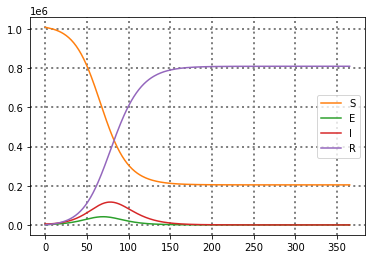

In [3]:
# Plot für Werte aller Landkreise
fig, ax = plt.subplots()
ax.grid(linestyle=':', linewidth=2.0, color='#808080')
colors = list(matplotlib.colors.TABLEAU_COLORS.values())
ax.plot(t, np.sum(S, axis=1), colors[1], label='S')
ax.plot(t, np.sum(E, axis=1), colors[2], label='E')
ax.plot(t, np.sum(I, axis=1), colors[3], label='I')
ax.plot(t, np.sum(R, axis=1), colors[4], label='R')
ax.legend(loc='best')
plt.show()

In [3]:
from simulation_code.seiqrd import SEIQRDModel
import numpy as np

D = 4
K = 3

# Werte sind Beispielwerte
alpha, beta, gamma = 0.3, 0.1, 0.1  # Raten (für alle Landkreise gleich)
beta_asym, beta_sym, beta_sev = np.ones((D, K, K)) * beta, np.ones((D, K, K)) * beta, np.ones((D, K, K)) * beta
gamma_asym, gamma_sym, gamma_sev = np.ones((D, K)) * gamma, np.ones((D, K)) * gamma, np.ones((D, K)) * gamma
gamma_sev_r = np.ones((D, K))* 0.25 * gamma
gamma_sev_d = np.ones((D, K))* 0.25 * gamma

epsilon = np.ones((D, K)) * 0.2
eta = np.ones((D, K)) * 0.25
nu = np.ones((D, K)) * 0.0075
psi = np.ones((D, K)) * 0.3
sigma = np.ones((D, K)) * 0.2

N = np.ones((D, K)) * 5000000 # Einwohner pro Landkreis und Gruppe
t = np.linspace(0, 180, 180)
B = np.sum(N, axis=1) * 0.025 # Betten pro Landkreis
N_total = np.sum(N, axis=1) # Gesamtbevölkerung

# Infektiöse pro Landkreis und Gruppe
Iasym = np.array([[4000, 7000, 5000], [4000, 7000, 5000], [4000, 7000, 5000], [4000, 7000, 5000]])
Isym = Iasym * 0.5
Isev = Iasym * 0.05

Qasym, Qsym, Qsev = np.zeros((D, K)), np.zeros((D, K)), np.zeros((D, K)) # Personen in Quarantäne pro Landkreis und Gruppe
Etr, Ent = np.zeros((D, K)), np.zeros((D, K)) # Infizierte pro Landkreis und Gruppe
R0 = np.ones((D, K)) * beta / gamma # Genesene Personen pro Landkreis und Gruppe
D0 = np.zeros((D, K)) # Tote pro Landkreis und Gruppe
S0 = N - Etr - Ent - Iasym - Isym - Isev - R0 # Anfällige pro Landkreis und Gruppe


model2 = SEIQRDModel(D, K, N_total, N, B, S0, Etr, Ent, Iasym, Isym, Isev, Qasym, Qsym, Qsev, R0, D0, alpha,
                     beta_asym, beta_sym, beta_sev, gamma_asym, gamma_sym, gamma_sev,
                     gamma_sev_r, gamma_sev_d, epsilon, eta, nu, psi, sigma)

# Berechnung der Werte über Funktion im Model
S, E_tr, E_nt, I_asym, I_sym, I_sev, Q_asym, Q_sym, Q_sev, R, D = model2.simulate(t)

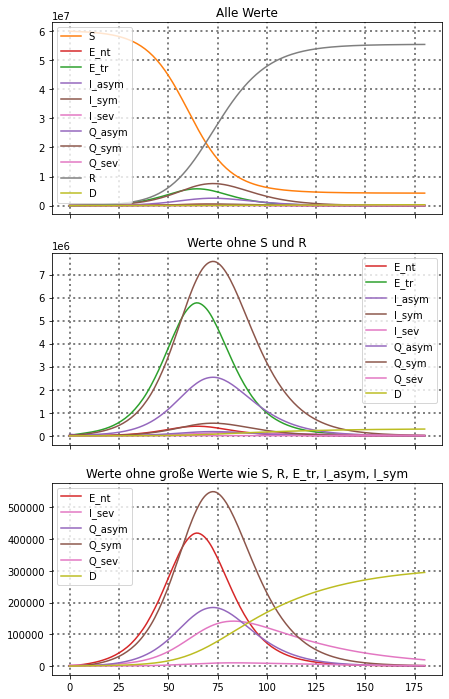

In [27]:
import matplotlib
import matplotlib.pyplot as plt

colors = list(matplotlib.colors.TABLEAU_COLORS.values())

fig, ax = plt.subplots(3, figsize=(7,12), sharex=True)
ax[0].grid(linestyle=':', linewidth=2.0, color='#808080')
ax[0].plot(t, np.sum(S, axis=(1,2)), colors[1], label='S')
ax[0].plot(t, np.sum(E_nt, axis=(1,2)), colors[3], label='E_nt')
ax[0].plot(t, np.sum(E_tr, axis=(1,2)), colors[2], label='E_tr')
ax[0].plot(t, np.sum(I_asym, axis=(1,2)), colors[4], label='I_asym')
ax[0].plot(t, np.sum(I_sym, axis=(1,2)), colors[5], label='I_sym')
ax[0].plot(t, np.sum(I_sev, axis=(1,2)), colors[6], label='I_sev')
ax[0].plot(t, np.sum(Q_asym, axis=(1,2)), colors[4], label='Q_asym')
ax[0].plot(t, np.sum(Q_sym, axis=(1,2)), colors[5], label='Q_sym')
ax[0].plot(t, np.sum(Q_sev, axis=(1,2)), colors[6], label='Q_sev')
ax[0].plot(t, np.sum(R, axis=(1,2)), colors[7], label='R')
ax[0].plot(t, np.sum(D, axis=(1,2)), colors[8], label='D')
ax[0].legend(loc='best')
ax[0].set_title('Alle Werte')

ax[1].grid(linestyle=':', linewidth=2.0, color='#808080')
ax[1].plot(t, np.sum(E_nt, axis=(1,2)), colors[3], label='E_nt')
ax[1].plot(t, np.sum(E_tr, axis=(1,2)), colors[2], label='E_tr')
ax[1].plot(t, np.sum(I_asym, axis=(1,2)), colors[4], label='I_asym')
ax[1].plot(t, np.sum(I_sym, axis=(1,2)), colors[5], label='I_sym')
ax[1].plot(t, np.sum(I_sev, axis=(1,2)), colors[6], label='I_sev')
ax[1].plot(t, np.sum(Q_asym, axis=(1,2)), colors[4], label='Q_asym')
ax[1].plot(t, np.sum(Q_sym, axis=(1,2)), colors[5], label='Q_sym')
ax[1].plot(t, np.sum(Q_sev, axis=(1,2)), colors[6], label='Q_sev')
ax[1].plot(t, np.sum(D, axis=(1,2)), colors[8], label='D')
ax[1].legend(loc='best')
ax[1].set_title('Werte ohne S und R')

ax[2].grid(linestyle=':', linewidth=2.0, color='#808080')
ax[2].plot(t, np.sum(E_nt, axis=(1,2)), colors[3], label='E_nt')
ax[2].plot(t, np.sum(I_sev, axis=(1,2)), colors[6], label='I_sev')
ax[2].plot(t, np.sum(Q_asym, axis=(1,2)), colors[4], label='Q_asym')
ax[2].plot(t, np.sum(Q_sym, axis=(1,2)), colors[5], label='Q_sym')
ax[2].plot(t, np.sum(Q_sev, axis=(1,2)), colors[6], label='Q_sev')
ax[2].plot(t, np.sum(D, axis=(1,2)), colors[8], label='D')
ax[2].legend(loc='best')
ax[2].set_title('Werte ohne große Werte wie S, R, E_tr, I_asym, I_sym')
plt.show()